## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pylab as pl
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
pl.rcParams = 20,6

In [78]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [79]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

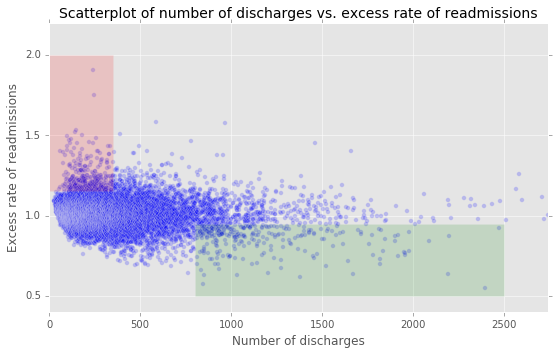

In [80]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

### Investigating initial observations
****

In [90]:
#cleaning up null values in the variables that will matter for analysis.
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

clean_hospital_read_df.rename(columns = {'Number of Discharges':'number_of_discharges',
                                  'Excess Readmission Ratio':'excess_readmission_ratio',
                                        'Number of Readmissions':'number_readmissions'},
                       inplace = True)

clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df.excess_readmission_ratio.notnull()]

clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,number_of_discharges,Footnote,excess_readmission_ratio,Predicted Readmission Rate,Expected Readmission Rate,number_readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13,07/01/2010,06/30/2013


* **In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1**
* **In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1**

In [91]:
df = clean_hospital_read_df

df = df[df.number_of_discharges < 100]
print "Hospitls with number of discharges < 100"
print "-"*30
print "Mean excess readmission rate {0:.3f}".format(df.excess_readmission_ratio.mean())
print "{0:.3f}% have readmission rate greater than 1".format(float(df[df.excess_readmission_ratio > 1].shape[0])/float(df.shape[0])*100)

df = clean_hospital_read_df
df = df[df.number_of_discharges > 1000]

print "\n\n"
print "Hospitls with number of discharges > 1000"
print "-"*30
print "Mean excess readmission rate {0:.3f}".format(df.excess_readmission_ratio.mean())
print "{0:.3f}% have readmission rate greater than 1".format(float(df[df.excess_readmission_ratio > 1].shape[0])/float(df.shape[0])*100)

Hospitls with number of discharges < 100
------------------------------
Mean excess readmission rate 1.023
63.215% have readmission rate greater than 1



Hospitls with number of discharges > 1000
------------------------------
Mean excess readmission rate 0.978
44.492% have readmission rate greater than 1


The initial claims seem to be true, so we can assume these are correct.

* **There is a significant correlation between hospital capacity (number of discharges) and readmission rates.**

In [92]:
#Checking if the datasets are normally distributed.
df = clean_hospital_read_df
x = df.number_of_discharges
y = df.excess_readmission_ratio

In [93]:
from scipy.stats.stats import linregress
slope, intercept, r_value, p_value, std_error = linregress(x,y)

P-value in this case will return a two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero.

In [94]:
print "Slope: {0}".format(slope)
print "Intercept: {0}".format(intercept)
print "R: {0}".format(r_value)
print "R-squared: {0}".format(r_value ** 2)
print "P-value: {0}".format(p_value)

Slope: -2.90105173306e-05
Intercept: 1.01810614737
R: -0.0973979435108
R-squared: 0.00948635940013
P-value: 1.22254737767e-25


** Interpretation of results**:

* The *p-value* is very small, which means that we reject the null hypothesis of the slope being 0. 
* The function returns to us a *very small slope*, which is close to 0. This means that it is very possible that there is no relationship between the number of discharges and the excess readmission ratio.
* *R squared* is very close to 0, showing that there is in fact almost no relationship between the two variables, in any case, not a strong correlation, in any direction. This means that if the number of discharges increases, there is no obvious change in the rate of readmissions.
* The statement that there would be a strong correlation between the two, is **false**.

* **Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.**

Since the recommendations mention hospitals with less than 300 number of discharges, which we assume this is what they mean by small facilities, we'll have a closer look in the distribution of the readmissions for a number of casses.

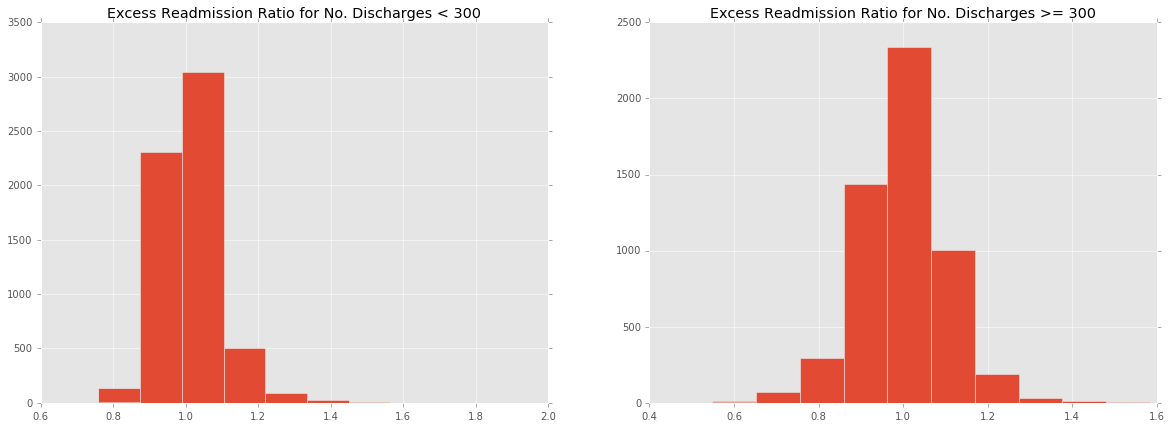

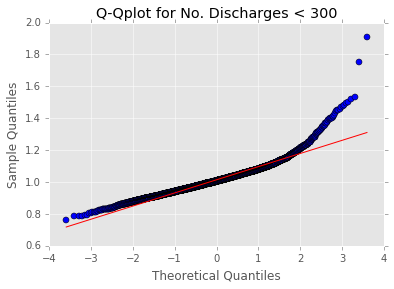

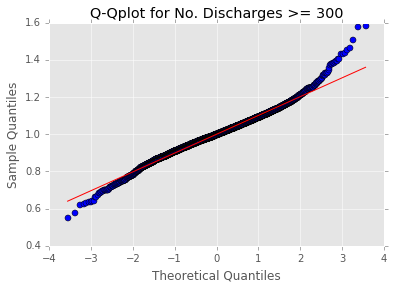

In [159]:
import statsmodels.api as sm
plt.figure(figsize=(20,15))
pl.subplot2grid((2,2),(0,0))
df = clean_hospital_read_df
df = df[df.number_of_discharges < 300]
df.excess_readmission_ratio.hist()
pl.title("Excess Readmission Ratio for No. Discharges < 300");

pl.subplot2grid((2,2),(0,1))
df = clean_hospital_read_df
df = df[df.number_of_discharges >= 300]
df.excess_readmission_ratio.hist()
pl.title("Excess Readmission Ratio for No. Discharges >= 300");

df = clean_hospital_read_df
df = df[df.number_of_discharges < 300]
sm.qqplot(df.excess_readmission_ratio, line='s')
pl.title("Q-Qplot for No. Discharges < 300");
plt.grid(True)

df = clean_hospital_read_df
df = df[df.number_of_discharges >= 300]
sm.qqplot(df.excess_readmission_ratio, line='s')
pl.title("Q-Qplot for No. Discharges >= 300")
plt.grid(True);

Both cases seem to be normally distributed, except for some extreams, but even so, they seem to show similar behaviour, if we look at Excess Readmission Ratio. So this statement seems** false.**

**A.** No, I do not agree with the analysis and recommendations, because:
* it's trying to highlight that extremes have a positive impact on excess rate of readmissions, instead of focusing on what's the general view.
* the correlation statement is false, which I've proved above.
* they're trying to prove there is a difference between hospital facilities based on capacity, when there isn't anything to prove that.
* the recommendations based on false statements are not valid.

**B.** An appropriate test would be a **two sample mean test** to see if there is indeed a difference between hospitals with less than 300 number of discharges and hospitals with more than that, from an excess readmission rate standpoint.

H0: miu_l300 - miu300 = 0

HA: miu_l300 - miu300 != 0

* Setup an appropriate hypothesis test.
* Compute and report the observed significance value (or p-value).
* Report statistical significance for α = .01.
* Discuss statistical significance and practical significance

#### The first step is to check conditions in order to apply the two sample mean test.

* **Independence** - they will definitely be independent since we establish 300 as a threshold of separation, so there's no chance of them interfering
* **Sample size/skew** - n>30 for each group. We can check.

In [189]:
df = clean_hospital_read_df
print "Number of observations for number of discharges: {0}".format(df[df.number_of_discharges < 300].shape[0])
print "Number of observations for excess readmission ratio: {0}".format(df[df.number_of_discharges >= 300].shape[0])


Number of observations for number of discharges: 6108
Number of observations for excess readmission ratio: 5389


The condition is met.

The next thing is to establish a **point estimate**

In [190]:
x = list(df[df.number_of_discharges < 300].excess_readmission_ratio)
y = list(df[df.number_of_discharges >= 300].excess_readmission_ratio)

x_bar_1 = df[df.number_of_discharges < 300].excess_readmission_ratio.mean()
x_bar_2 = df[df.number_of_discharges >= 300].excess_readmission_ratio.mean()
point_estimate = x_bar_1 - x_bar_2

In [193]:
degrees_freedom = min(len(x)-1, len(y)-1)
standard_error = ((df[df.number_of_discharges < 300].excess_readmission_ratio.std()**2/len(x) + df[df.number_of_discharges >= 300].excess_readmission_ratio.std()**2/len(y))) **0.5

T = ((x_bar_1 - x_bar_2) - 0)/standard_error
T

8.279706368010466

*Just to be sure, we can implement something that already exists in the scipy library. So here it goes:*

In [196]:
import scipy
scipy.stats.ttest_ind(x, y, axis=0, equal_var=False)

Ttest_indResult(statistic=8.2797063680112473, pvalue=1.3862099593114599e-16)

The statistics value returned will be the test statistic between the two variables. Since it is a very large value, the p-value will be very small, almost close to 0.

This means that there is a significant difference between the two means of the variables, so we reject the null hypothesis, and accept the alternative, stating that there is a difference in excess readmission ratio. 

#### For a confidence level of 0.01, we must estimate the difference for a 99% confidence interval.

Since this is a two tailed test, and we're looking for the t-value of a 99% confidence interval, given 5388 degrees of freedom, the t-value will be 2.57

In [203]:
#estimating the difference
print "for a 90% Confidence interval"
((x_bar_1 - x_bar_2) - 2.57 * standard_error,(x_bar_1 - x_bar_2) + 2.57 * standard_error)

for a 90% Confidence interval


(0.009907770514139803, 0.018826957799846687)

We are 99% confident that there is a 0.0099 to 0.0188 difference in Excess Readmission Ratio between hospitals with less than 300 discharges and hospital above 300 discharges.

However, even if the t-test did provide a highly statistically significant result, we're can't confirm that this is practically significant that the smaller capacitated hospitals to demonstrate upgraded resource allocation for quality care. Since the estimation of the difference is too small, we wouldn't recommend any further actions on hospitals.